In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [27]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [22]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)

pd.DataFrame(scaled_df).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [23]:
model = KMeans(n_clusters=3,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               verbose=0,
               random_state=42,
               copy_x=True,
               algorithm='auto')

model.fit(scaled_df)
model.inertia_

2149.283956221758

Text(0, 0.5, 'Inertia or SSE')

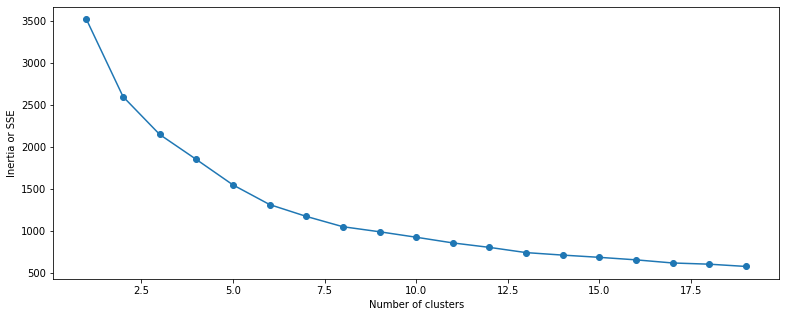

In [24]:
clusters = range(1, 20)
sse=[]
for cluster in clusters:
    model = KMeans(n_clusters=cluster,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               verbose=0,
               random_state=42,
               copy_x=True,
               algorithm='auto')

    model.fit(scaled_df)
    sse.append(model.inertia_)

sse_df = pd.DataFrame(np.column_stack((clusters, sse)), columns=['cluster', 'SSE'])
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(sse_df['cluster'], sse_df['SSE'], marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia or SSE')

In [25]:
model = KMeans(n_clusters=5,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               verbose=0,
               random_state=42,
               copy_x=True,
               algorithm='auto')

model.fit(scaled_df)

KMeans(n_clusters=5, random_state=42)

In [28]:
print('SSE: ', model.inertia_)
print('\nCentroids: \n', model.cluster_centers_)

pred = model.predict(scaled_df)
data['cluster'] = pred
print('\nCount in each cluster: \n', data['cluster'].value_counts())

SSE:  1548.8659343652666

Centroids: 
 [[ 1.44865163e+00  1.69928497e-01 -3.14722179e-01  4.52466342e-01
   6.66146634e-01 -3.51066687e-01  6.83203927e-01  4.65876480e-02]
 [-6.80159888e-01  5.90668285e-01  1.49701883e-01 -3.38970651e-01
  -4.35787592e-01  8.62596306e-02 -4.39578802e-01 -7.92402039e-02]
 [-5.72772431e-01 -1.59749436e+00  1.45371704e-02 -3.44758082e-01
  -4.02466315e-01  7.96677044e-02 -4.24411072e-01 -1.33102511e-01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]
 [-6.90297086e-01 -5.58343155e-02  1.80335587e+00  3.33298726e+00
   9.42518505e-01  9.40980070e+00 -4.46409015e-01  8.96415723e+00]]

Count in each cluster: 
 1    211
0    126
2     91
3     10
4      2
Name: cluster, dtype: int64
